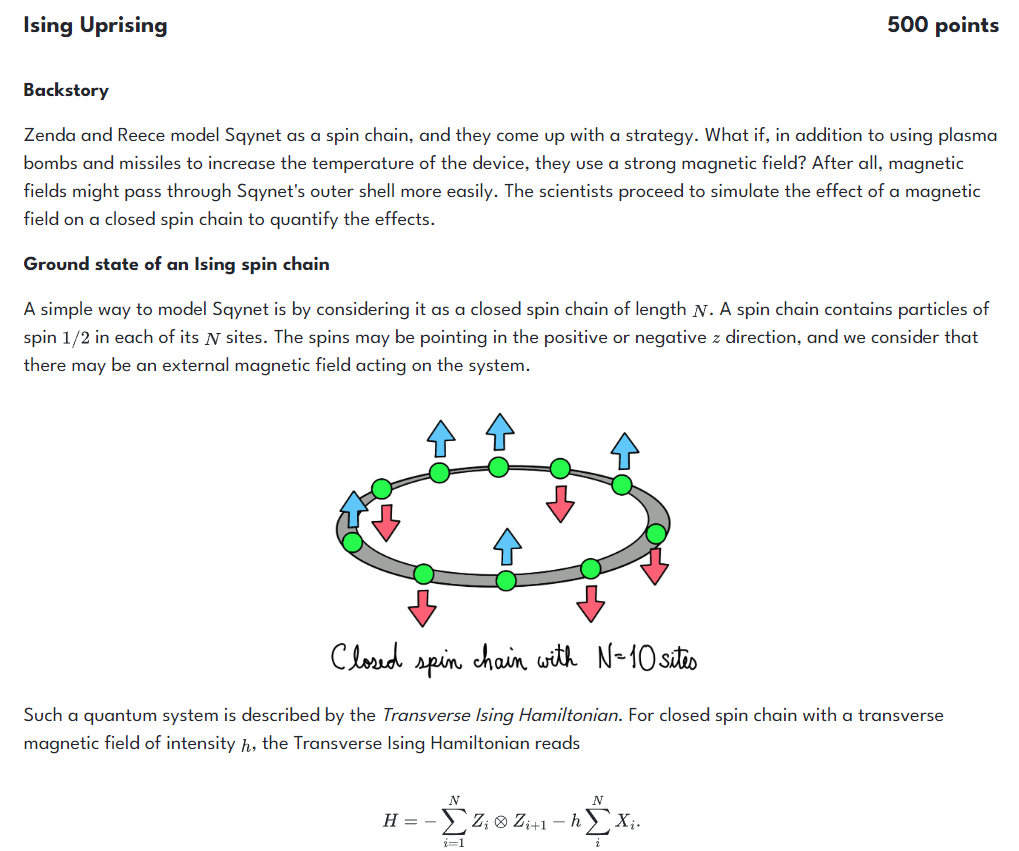

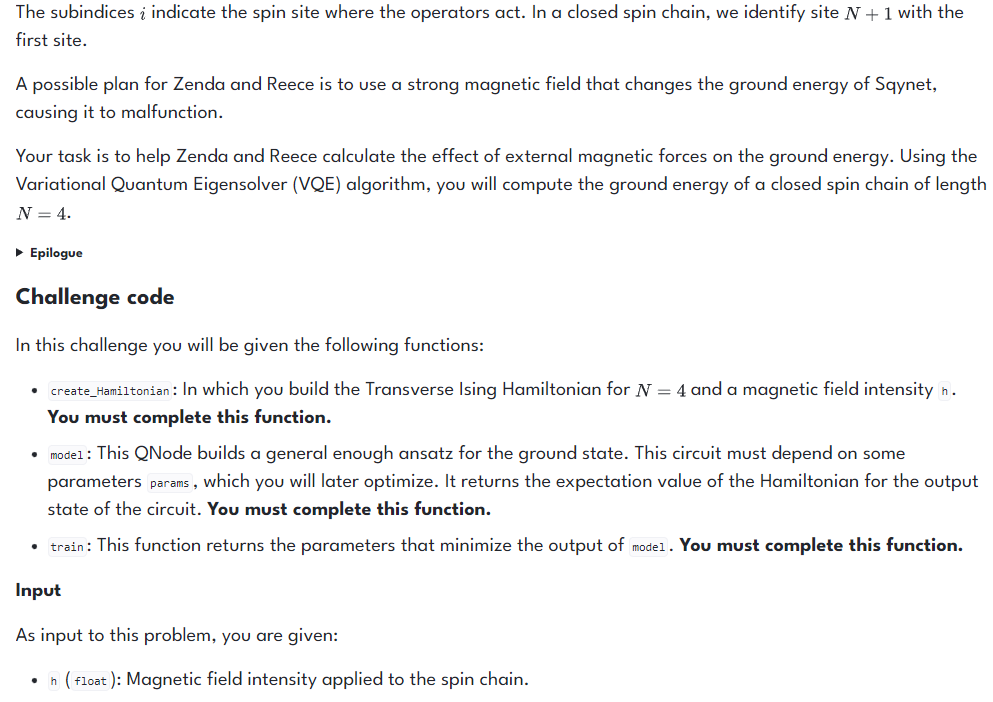

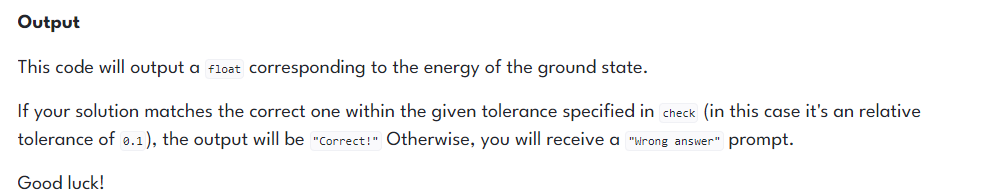

In [108]:
import json
import pennylane as qml
import pennylane.numpy as np

def create_Hamiltonian(h):
    """
    Function in charge of generating the Hamiltonian of the statement.

    Args:
        h (float): magnetic field strength

    Returns:
        (qml.Hamiltonian): Hamiltonian of the statement associated to h
    """

    ######################
    # Put your code here #
    ops = [qml.PauliX(3)]
    couplings = [-h]
    
    for i in range(3):
        couplings = [-h] + couplings
        ops = [qml.PauliX(i)] + ops        

    for i in range(4):
        couplings = [-1] + couplings
        ops = [qml.PauliZ(i)@qml.PauliZ((i+1)%4)] + ops

    return qml.Hamiltonian(couplings,ops)
    ######################

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def model(params, H):
    """
    To implement VQE you need an ansatz for the candidate ground state!
    Define here the VQE ansatz in terms of some parameters (params) that
    create the candidate ground state. These parameters will
    be optimized later.

    Args:
        params (numpy.array): parameters to be used in the variational circuit
        H (qml.Hamiltonian): Hamiltonian used to calculate the expected value

    Returns:
        (float): Expected value with respect to the Hamiltonian H
    """

    ######################:

    def qfunc(w1, w2):
        qml.SimplifiedTwoDesign(w1, w2, wires=range(4))
    
    qfunc(params[0], params[1])
    
    return qml.expval(H)
    ######################

def train(h):
    """
    In this function you must design a subroutine that returns the
    parameters that best approximate the ground state.

    Args:
        h (float): magnetic field strength

    Returns:
        (numpy.array): parameters that best approximate the ground state.
    """

    ######################
    # Put your code here #
    max_iterations = 200
    conv_tol = 1e-05
    #opt = qml.GradientDescentOptimizer(stepsize=0.05)
    opt = opt = qml.AdamOptimizer(stepsize=0.1)
    n_wires = 4
    n_layers = 2
    w1 = np.zeros((n_wires), requires_grad=True)
    w2 = np.zeros((n_layers, n_wires - 1, 2), requires_grad=True)
    params = [w1,w2]
    print(f"init_w1: {w1}")
    print(f"init_w2: {w2}")
    #print(f"params: {params}")
    H = create_Hamiltonian(h)
    energy = model(params, H)
    print(f"init_energy: {energy}")
    
    def cost_fn(params):
        return model(params, H)
    
    for n in range(max_iterations):
        params, prev_energy = opt.step_and_cost(cost_fn, params)
        #print(f"params: {params}")
        energy = cost_fn(params)
        conv = np.abs(energy - prev_energy)
        print(f"params_iteration: {params}")
        print(f"energy_iteration: {energy}")
        
        #if conv <= conv_tol:
        #    break
            
    print('Final value of the ground-state energy = {:.8f}'.format(energy))
    return params
    ######################


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    params = train(ins)
    return str(model(params, create_Hamiltonian(ins)))


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-1
    ), "The expected value is not correct."


test_cases = [['1.0', '-5.226251859505506'], ['2.3', '-9.66382463698038']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '1.0'...
init_w1: [0. 0. 0. 0.]
init_w2: [[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
init_energy: -4.0
params_iteration: [tensor([0., 0., 0., 0.], requires_grad=True), tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]], requires_grad=True)]
energy_iteration: -4.0
params_iteration: [tensor([0., 0., 0., 0.], requires_grad=True), tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]], requires_grad=True)]
energy_iteration: -4.0
params_iteration: [tensor([0., 0., 0., 0.], requires_grad=True), tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]], requires_grad=True)]
energy_iteration: -4.0
params_iteration: [tensor([0., 0., 0., 0.], requires_grad=True), tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
   

KeyboardInterrupt: 